In [1]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np

Mounted at /content/gdrive


In [2]:
# Read processed trainging data
df = pd.read_csv('/content/gdrive/MyDrive/colab_notebooks/collab_ws/driver_monitoring_system/driver_drowsiness_detection/Data/final_with_main_features.csv',sep=',')
print(df)

       Respondent  Y    EAR    MAR  Circularity    MOE      EAR_N      MAR_N  \
0               1  0  0.320  0.806        0.468  2.518  -1.117274  -0.719321   
1               1  0  0.362  0.875        0.516  2.421   0.811172   1.141922   
2               1  0  0.351  0.817        0.459  2.328   0.306103  -0.422601   
3               1  0  0.329  0.867        0.488  2.640  -0.704036   0.926126   
4               1  0  0.219  0.849        0.362  3.873  -5.754728   0.440584   
...           ... ..    ...    ...          ...    ...        ...        ...   
10555          22  1  0.255  1.072        0.387  4.198  -8.804592  17.614097   
10556          22  1  0.211  1.063        0.371  5.044 -27.857150  13.290637   
10557          22  1  0.236  1.069        0.408  4.539 -17.031833  16.172944   
10558          22  1  0.239  1.072        0.387  4.483 -15.732795  17.614097   
10559          22  1  0.215  1.049        0.383  4.881 -26.125100   6.565254   

       Circularity_N      MOE_N  
0    

In [3]:
# Remove raw data column
df=df.drop(["Respondent","EAR","MAR","Circularity","MOE"], axis=1)
print(df)

       Y      EAR_N      MAR_N  Circularity_N      MOE_N
0      0  -1.117274  -0.719321      -0.424239   1.006943
1      0   0.811172   1.141922       1.142182  -0.014034
2      0   0.306103  -0.422601      -0.717943  -0.992909
3      0  -0.704036   0.926126       0.228436   2.291059
4      0  -5.754728   0.440584      -3.883418  15.269048
...   ..        ...        ...            ...        ...
10555  1  -8.804592  17.614097      -4.415031  15.966276
10556  1 -27.857150  13.290637      -6.045197  46.734998
10557  1 -17.031833  16.172944      -2.275439  28.368326
10558  1 -15.732795  17.614097      -4.415031  26.331625
10559  1 -26.125100   6.565254      -4.822573  40.806745

[10560 rows x 5 columns]


In [4]:
train_percentage = 14/22
train_index = int(len(df)*train_percentage)
test_index = len(df)-train_index


In [5]:
df_train = df[:train_index]
print(df_train)
df_test = df[-test_index:]
print(df_test)

      Y     EAR_N     MAR_N  Circularity_N      MOE_N
0     0 -1.117274 -0.719321      -0.424239   1.006943
1     0  0.811172  1.141922       1.142182  -0.014034
2     0  0.306103 -0.422601      -0.717943  -0.992909
3     0 -0.704036  0.926126       0.228436   2.291059
4     0 -5.754728  0.440584      -3.883418  15.269048
...  ..       ...       ...            ...        ...
6715  1 -7.729089  6.348007      -3.132842  38.362079
6716  1 -8.096412  6.321033      -4.927699  41.509215
6717  1 -2.586566  7.211192      -2.708603  14.774347
6718  1 -2.862059  5.457847      -1.794857  13.195517
6719  1 -4.009943  5.673644      -4.177122  17.237323

[6720 rows x 5 columns]
       Y      EAR_N      MAR_N  Circularity_N      MOE_N
6720   0   1.013063  -0.820695       0.944696  -1.019544
6721   0  -0.026660   1.113800       0.102684   0.040308
6722   0  -0.986404  -0.293105      -1.047380   0.979237
6723   0  -3.305785  12.544902      -2.115297   7.912138
6724   0   0.826446  -1.787942       0.123

In [6]:
x_test = df_test.drop(["Y"],axis=1)
y_test = df_test["Y"]
print(x_test)
print(y_test)

           EAR_N      MAR_N  Circularity_N      MOE_N
6720    1.013063  -0.820695       0.944696  -1.019544
6721   -0.026660   1.113800       0.102684   0.040308
6722   -0.986404  -0.293105      -1.047380   0.979237
6723   -3.305785  12.544902      -2.115297   7.912138
6724    0.826446  -1.787942       0.123221  -0.957897
...          ...        ...            ...        ...
10555  -8.804592  17.614097      -4.415031  15.966276
10556 -27.857150  13.290637      -6.045197  46.734998
10557 -17.031833  16.172944      -2.275439  28.368326
10558 -15.732795  17.614097      -4.415031  26.331625
10559 -26.125100   6.565254      -4.822573  40.806745

[3840 rows x 4 columns]
6720     0
6721     0
6722     0
6723     0
6724     0
        ..
10555    1
10556    1
10557    1
10558    1
10559    1
Name: Y, Length: 3840, dtype: int64


In [7]:
x_train = df_train.drop('Y',axis=1)
y_train = df_train['Y']
print(x_train)
print(y_train)

         EAR_N     MAR_N  Circularity_N      MOE_N
0    -1.117274 -0.719321      -0.424239   1.006943
1     0.811172  1.141922       1.142182  -0.014034
2     0.306103 -0.422601      -0.717943  -0.992909
3    -0.704036  0.926126       0.228436   2.291059
4    -5.754728  0.440584      -3.883418  15.269048
...        ...       ...            ...        ...
6715 -7.729089  6.348007      -3.132842  38.362079
6716 -8.096412  6.321033      -4.927699  41.509215
6717 -2.586566  7.211192      -2.708603  14.774347
6718 -2.862059  5.457847      -1.794857  13.195517
6719 -4.009943  5.673644      -4.177122  17.237323

[6720 rows x 4 columns]
0       0
1       0
2       0
3       0
4       0
       ..
6715    1
6716    1
6717    1
6718    1
6719    1
Name: Y, Length: 6720, dtype: int64


In [8]:
x_test.shape

(3840, 4)

In [9]:
x_train.shape

(6720, 4)

In [10]:
x_shaped_train  = np.array(x_train).reshape(-1,5,4)
x_shaped_test  = np.array(x_test).reshape(-1,5,4)
print(x_shaped_train)
print(x_shaped_test)

[[[-1.11727423e+00 -7.19320922e-01 -4.24238967e-01  1.00694316e+00]
  [ 8.11171703e-01  1.14192196e+00  1.14218183e+00 -1.40340511e-02]
  [ 3.06102529e-01 -4.22601042e-01 -7.17942866e-01 -9.92909114e-01]
  [-7.04035818e-01  9.26125687e-01  2.28436367e-01  2.29105884e+00]
  [-5.75472755e+00  4.40584065e-01 -3.88341823e+00  1.52690476e+01]]

 [[-1.39276651e+00  1.70838719e-01 -8.81111700e-01  2.65945268e+00]
  [-5.20374300e-01 -4.49575576e-02  3.58971433e-01  7.33279169e-01]
  [ 3.06102529e-01 -1.17788801e+00 -7.17942866e-01 -1.86652879e+00]
  [-1.39276651e+00 -2.87728369e-01 -7.17942866e-01  2.04897146e+00]
  [-3.36712782e-01 -3.95626507e-01 -4.56872733e-01  3.85936405e-02]]

 [[-9.33612715e-01 -1.01604080e+00 -1.69695587e+00  3.22783175e-01]
  [-9.33612715e-01 -1.58250603e+00 -3.26337667e-02 -3.82427892e-01]
  [-5.20374300e-01  4.13609530e-01 -7.50576633e-01  1.30165824e+00]
  [-2.17332796e+00 -1.15091348e+00 -2.18646237e+00  2.45946745e+00]
  [-9.33612715e-01 -6.38397318e-01 -1.631688

In [11]:
y_train = np.array(y_train)
print(len(y_train))
y_test = np.array(y_test)
print(len(y_test))

y_shaped_train  = []
for i in range(0, len(y_train), 5):
  y_shaped_train.append([y_train[i]])
print(y_shaped_train)
print(len(y_shaped_train))

y_shaped_test  = []
for i in range(0, len(y_test), 5):
  y_shaped_test.append([y_test[i]])
print(y_shaped_test)
print(len(y_shaped_test))

6720
3840
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0],

In [12]:
x_shaped_train.shape

(1344, 5, 4)

In [13]:
x_shaped_test.shape

(768, 5, 4)

In [14]:
y_shaped_train = np.array(y_shaped_train)
y_shaped_train.shape

(1344, 1)

In [15]:
y_shaped_test = np.array(y_shaped_test)
y_shaped_test.shape

(768, 1)

In [44]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout, ZeroPadding3D, LSTM
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam, RMSprop
# Check if GPU is use or not
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

from collections import deque
import sys

metrics = ['accuracy']
model = Sequential()
model.add(Dense(1024, activation='sigmoid'))
model.add(LSTM(512, return_sequences=True,
                       input_shape=(5, 4),
                       dropout=0.5))

model.add(Flatten())
# Dense is fully connected layer. 16 hidden units
# activation for lstm is basically sigmoid or tanh
model.add(Dense(216, activation='sigmoid')) #FC1
model.add(Dense(32, activation='tanh')) # FC2
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))# FC3
model.add(Dropout(0.5))
model.add(Dense(1, activation='tanh'))# Output Layer
optimizer = Adam(learning_rate=0.00005) #popular learning rate for Adam optimizer: 0.001, 0.00005

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
history = model.fit(x_shaped_train, y_shaped_train, validation_data = (x_shaped_test,y_shaped_test), epochs=320, batch_size=10)
# model.predict_classes(x_shaped_test)
predict_x=model.predict(x_shaped_test) 
classes_x=np.argmax(predict_x,axis=1)

Epoch 1/320
135/135 [==============================] - 4s 12ms/step - loss: 3.3616 - accuracy: 0.4978 - val_loss: 0.6886 - val_accuracy: 0.4688
Epoch 2/320
135/135 [==============================] - 1s 8ms/step - loss: 2.2572 - accuracy: 0.5171 - val_loss: 0.8189 - val_accuracy: 0.5000
Epoch 3/320
135/135 [==============================] - 1s 8ms/step - loss: 2.1605 - accuracy: 0.5246 - val_loss: 0.7694 - val_accuracy: 0.5000
Epoch 4/320
135/135 [==============================] - 1s 8ms/step - loss: 1.7927 - accuracy: 0.5193 - val_loss: 0.6880 - val_accuracy: 0.6315
Epoch 5/320
135/135 [==============================] - 1s 8ms/step - loss: 1.9477 - accuracy: 0.5000 - val_loss: 0.9730 - val_accuracy: 0.5000
Epoch 6/320
135/135 [==============================] - 1s 8ms/step - loss: 1.6235 - accuracy: 0.4948 - val_loss: 0.6912 - val_accuracy: 0.6549
Epoch 7/320
135/135 [==============================] - 1s 11ms/step - loss: 1.4110 - accuracy: 0.5335 - val_loss: 0.6961 - val_accuracy: 0.64

24/24 [==============================] - 0s 3ms/step
[0.5, 0.0, 0.9110276963975694]
[[384   0]
 [384   0]]


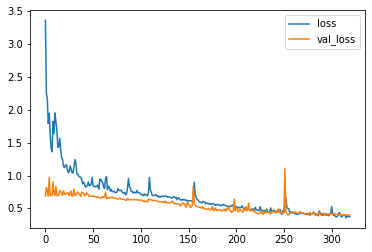

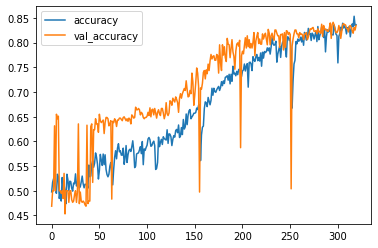

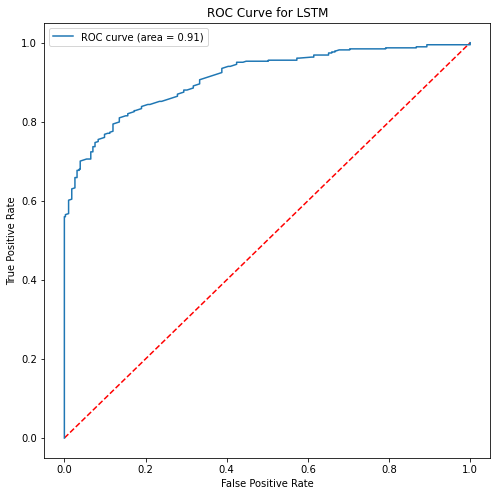

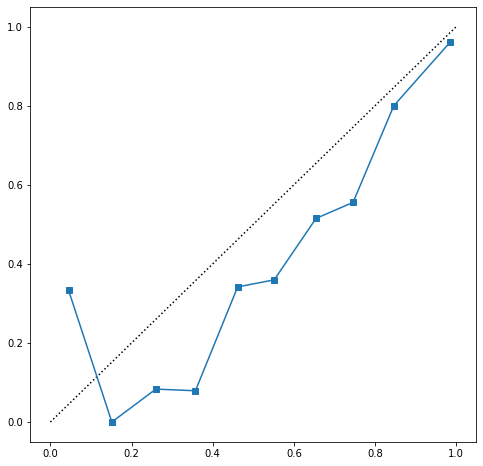

In [45]:
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot()
history_df[['accuracy','val_accuracy']].plot()
########
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

y_score_10=model.predict(x_shaped_test) 
pred_rnn=np.argmax(y_score_10,axis=1)
# pred_rnn = model.predict_classes(x_shaped_test)
# y_score_10 = model.predict_proba(x_shaped_test)

acc10 = accuracy_score(y_shaped_test, pred_rnn)
f1_score_10 = metrics.f1_score(y_shaped_test, np.array(pred_rnn))
roc_10 = metrics.roc_auc_score(y_shaped_test, y_score_10)
print([acc10, f1_score_10, roc_10])
print(confusion_matrix(y_shaped_test, pred_rnn))
########
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_shaped_test, y_score_10)
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % roc_10)
plt.title('ROC Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
#########
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_shaped_test,y_score_10,n_bins=10,normalize=True)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'LSTM')

In [ ]:
# Save model
model.save("/content/gdrive/MyDrive/CV_collab_workspace/AI-Project-Final-from-Team-9/Codes/3-LSTM/LSTM_driver_drowsiness_detection_v2.h5")